In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cleaned_data = 'NFL_Game_Data.csv'
games = pd.read_csv(cleaned_data)
games.head()

Date Week  Day    Time            HomeTeam              AwayTeam  \
0  2017-10-19    7  Thu  8:25PM   Las Vegas Raiders    Kansas City Chiefs   
1  2017-10-22    7  Sun  1:00PM   Minnesota Vikings      Baltimore Ravens   
2  2017-10-22    7  Sun  1:00PM    Los Angeles Rams     Arizona Cardinals   
3  2017-10-22    7  Sun  1:00PM       Chicago Bears     Carolina Panthers   
4  2017-10-22    7  Sun  1:00PM  Indianapolis Colts  Jacksonville Jaguars   

   HomePoints  AwayPoints  HomeYards  AwayYards  ...  Away_Avg_YardsAllowed  \
0          31          30        505        425  ...                 378.17   
1          24          16        357        208  ...                 330.83   
2          33           0        425        196  ...                 340.33   
3          17           3        153        293  ...                 280.00   
4           0          27        232        518  ...                 311.67   

   Away_Avg_TurnoversForced  Away_WinRate WinRate_Diff Avg_Points_Diff  \
0                      1.33          0.83        -0.50           -8.83   
1                      2.33          0.50         0.17            1.33   
2                      1.00          0.50         0.17           10.00   
3                      0.67          0.67        -0.33           -3.83   
4                      2.67          0.50        -0.17           -6.17   

   Avg_Yards_Diff  Avg_Turnovers_Diff  Avg_PointsAllowed_Diff  \
0         -108.67                1.00                   -0.67   
1           66.83               -1.00                   -3.50   
2            3.83                0.33                   -3.33   
3          -16.67                0.67                    4.33   
4          -34.33                0.50                   14.17   

   Avg_YardsAllowed_Diff  Avg_TurnoversForced_Diff  
0                 -28.33                     -0.50  
1                 -35.33                     -1.00  
2                   9.83                      0.67  
3                  22.67                      0.33  
4                  98.33                     -1.33  

[5 rows x 36 columns]

In [3]:
# Example: Filter games where Buffalo Bills played
team = "Buffalo Bills"
subset_df = games[(games["HomeTeam"] == team) | (games["AwayTeam"] == team)]

# Select Home_WinRate and Away_WinRate columns
result = subset_df[["HomeTeam", "AwayTeam", "Home_WinRate", "Away_WinRate"]]

print(result.head())

              HomeTeam              AwayTeam  Home_WinRate  Away_WinRate
11       Buffalo Bills     Las Vegas Raiders          0.67          0.33
15       New York Jets         Buffalo Bills          0.50          0.67
27       Buffalo Bills    New Orleans Saints          0.67          0.83
65  Kansas City Chiefs         Buffalo Bills          0.33          0.50
81       Buffalo Bills  New England Patriots          0.50          1.00


In [4]:
pd.to_datetime(games['Date'])

0      2017-10-19
1      2017-10-22
2      2017-10-22
3      2017-10-22
4      2017-10-22
          ...    
1888   2024-11-03
1889   2024-11-03
1890   2024-11-03
1891   2024-11-03
1892   2024-11-04
Name: Date, Length: 1893, dtype: datetime64[ns]

In [5]:
print(games.describe())

        HomePoints   AwayPoints    HomeYards    AwayYards  HomeTurnovers  \
count  1893.000000  1893.000000  1893.000000  1893.000000    1893.000000   
mean     23.380349    21.685156   348.617010   337.306392       1.284205   
std       9.522149     9.562257    80.190508    83.453568       1.154341   
min       0.000000     0.000000   131.000000   103.000000       0.000000   
25%      17.000000    16.000000   292.000000   280.000000       0.000000   
50%      23.000000    21.000000   351.000000   337.000000       1.000000   
75%      30.000000    28.000000   403.000000   396.000000       2.000000   
max      49.000000    47.000000   570.000000   572.000000       5.000000   

       AwayTurnovers      HomeWin  Home_Avg_PointsScored  \
count    1893.000000  1893.000000            1893.000000   
mean        1.326466     0.552562              22.509303   
std         1.160084     0.497361               4.988098   
min         0.000000     0.000000               7.500000   
25%         0.0

In [6]:
# Check for missing values in the dataset
print(games.isnull().sum())

Date                        0
Week                        0
Day                         0
Time                        0
HomeTeam                    0
AwayTeam                    0
HomePoints                  0
AwayPoints                  0
HomeYards                   0
AwayYards                   0
HomeTurnovers               0
AwayTurnovers               0
HomeWin                     0
Home_Team_Name              0
Away_Team_Name              0
Home_Avg_PointsScored       0
Home_Avg_YardsEarned        0
Home_Avg_Turnovers          0
Home_Avg_PointsAllowed      0
Home_Avg_YardsAllowed       0
Home_Avg_TurnoversForced    0
Home_WinRate                0
Away_Avg_PointsScored       0
Away_Avg_YardsEarned        0
Away_Avg_Turnovers          0
Away_Avg_PointsAllowed      0
Away_Avg_YardsAllowed       0
Away_Avg_TurnoversForced    0
Away_WinRate                0
WinRate_Diff                0
Avg_Points_Diff             0
Avg_Yards_Diff              0
Avg_Turnovers_Diff          0
Avg_Points

In [7]:
# Check the data types of each column
print(games.dtypes)

Date                         object
Week                         object
Day                          object
Time                         object
HomeTeam                     object
AwayTeam                     object
HomePoints                    int64
AwayPoints                    int64
HomeYards                     int64
AwayYards                     int64
HomeTurnovers                 int64
AwayTurnovers                 int64
HomeWin                       int64
Home_Team_Name               object
Away_Team_Name               object
Home_Avg_PointsScored       float64
Home_Avg_YardsEarned        float64
Home_Avg_Turnovers          float64
Home_Avg_PointsAllowed      float64
Home_Avg_YardsAllowed       float64
Home_Avg_TurnoversForced    float64
Home_WinRate                float64
Away_Avg_PointsScored       float64
Away_Avg_YardsEarned        float64
Away_Avg_Turnovers          float64
Away_Avg_PointsAllowed      float64
Away_Avg_YardsAllowed       float64
Away_Avg_TurnoversForced    

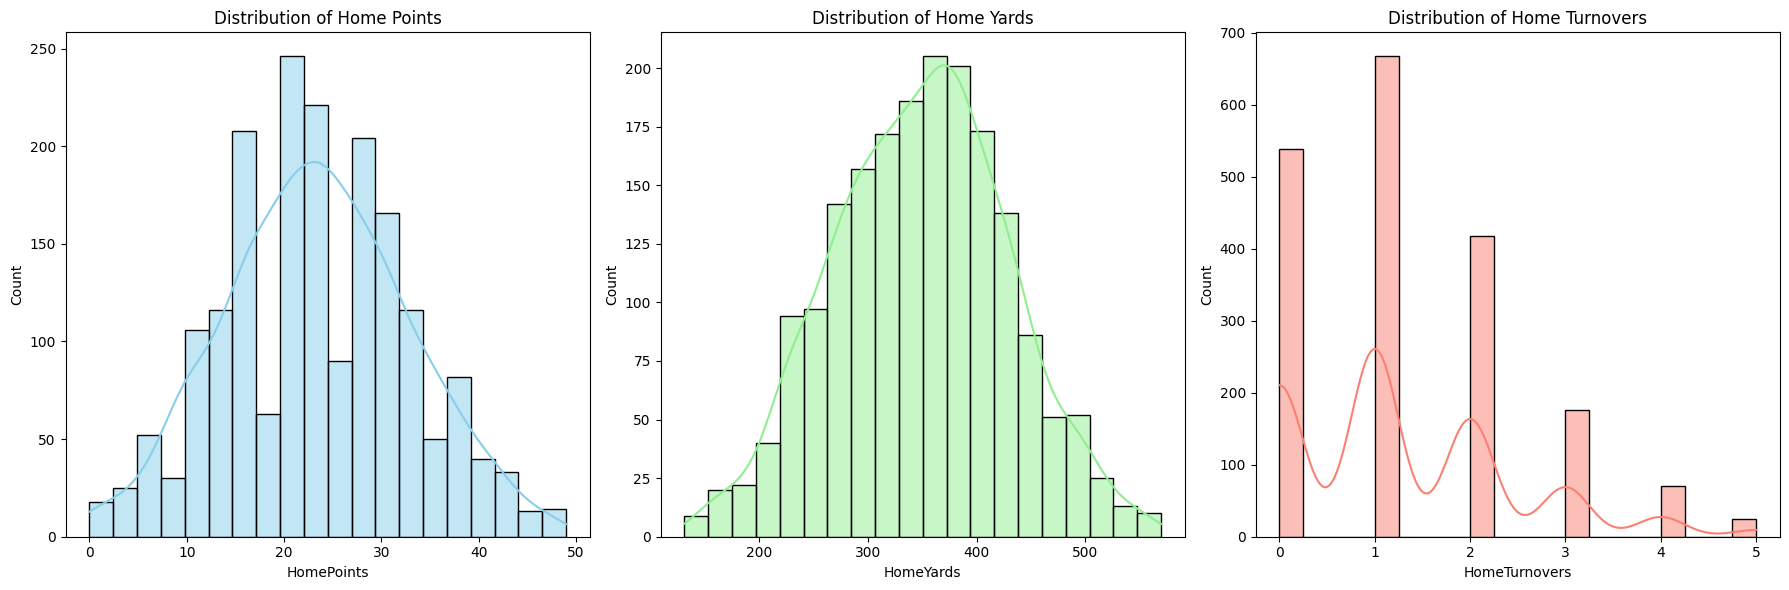

In [8]:
# Plot the distribution of key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Points distribution for Home Team
sns.histplot(games['HomePoints'], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('Distribution of Home Points')

# Yards distribution for Home Team
sns.histplot(games['HomeYards'], bins=20, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title('Distribution of Home Yards')

# Turnovers distribution for Home Team
sns.histplot(games['HomeTurnovers'], bins=20, kde=True, ax=axes[2], color="salmon")
axes[2].set_title('Distribution of Home Turnovers')

plt.tight_layout()
plt.show()


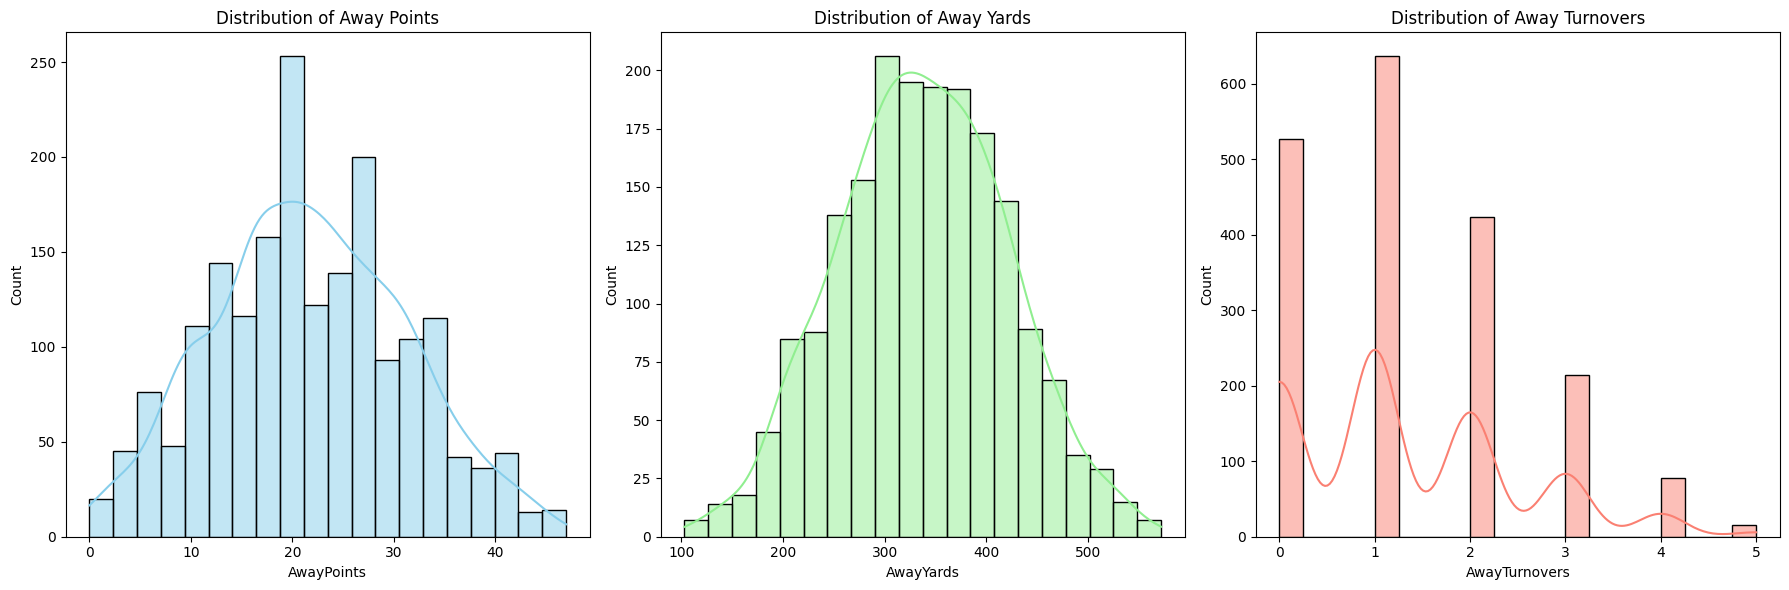

In [9]:
# Plot the distribution of key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Points distribution for Away Team
sns.histplot(games['AwayPoints'], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('Distribution of Away Points')

# Yards distribution for Away Team
sns.histplot(games['AwayYards'], bins=20, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title('Distribution of Away Yards')

# Turnovers distribution for Away Team
sns.histplot(games['AwayTurnovers'], bins=20, kde=True, ax=axes[2], color="salmon")
axes[2].set_title('Distribution of Away Turnovers')

plt.tight_layout()
plt.show()

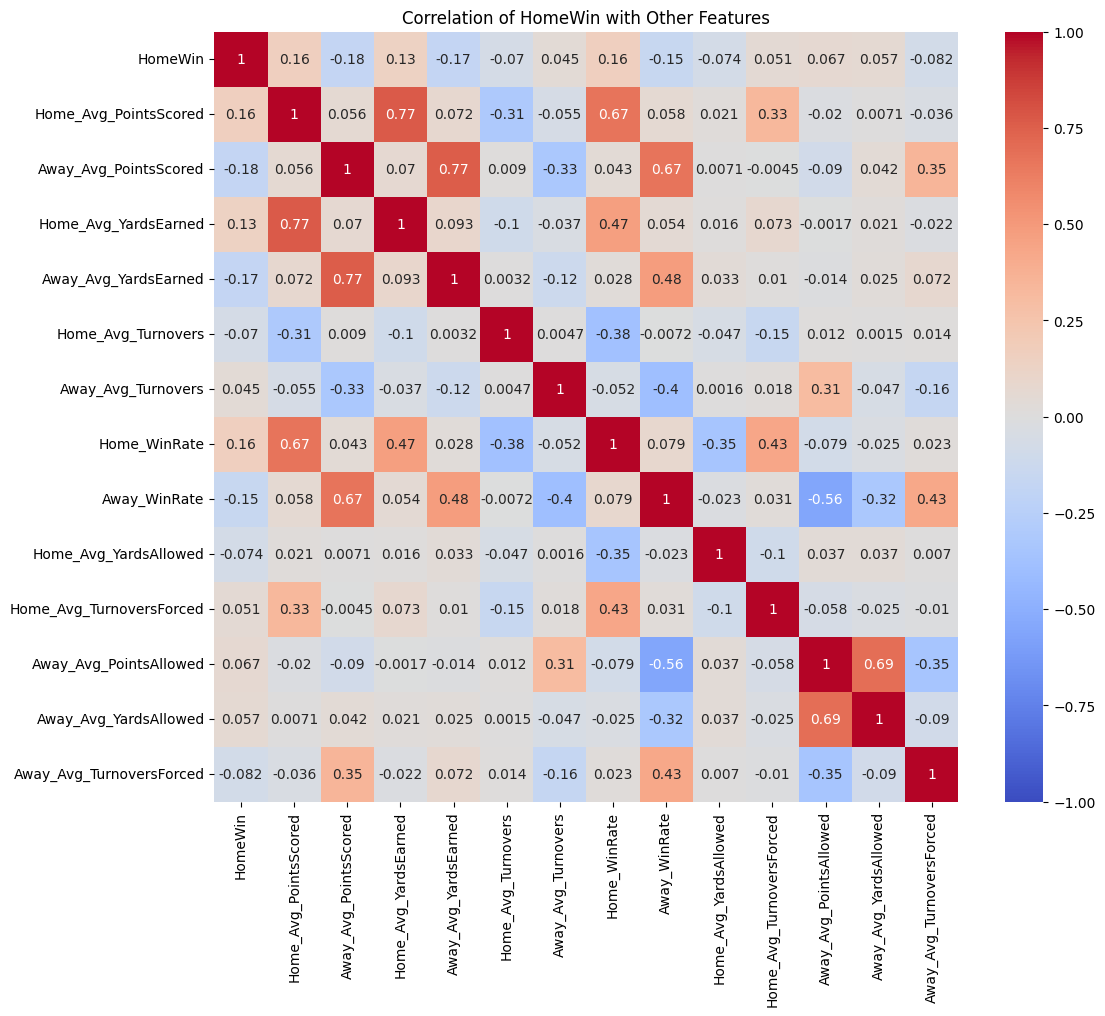

In [10]:
# Select columns
corr_columns = [
    'HomeWin', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored', 'Home_Avg_YardsEarned', 
    'Away_Avg_YardsEarned', 'Home_Avg_Turnovers', 'Away_Avg_Turnovers', 'Home_WinRate', 
    'Away_WinRate', 'Home_Avg_YardsAllowed', 'Home_Avg_TurnoversForced', 'Away_Avg_PointsAllowed', 
    'Away_Avg_YardsAllowed', 'Away_Avg_TurnoversForced'
]

# calc corr matrix
corr_matrix = games[corr_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of HomeWin with Other Features")
plt.show()


In [11]:
corr_matrix

HomeWin  Home_Avg_PointsScored  \
HomeWin                   1.000000               0.157159   
Home_Avg_PointsScored     0.157159               1.000000   
Away_Avg_PointsScored    -0.175154               0.056461   
Home_Avg_YardsEarned      0.133996               0.769199   
Away_Avg_YardsEarned     -0.172853               0.071722   
Home_Avg_Turnovers       -0.070100              -0.311538   
Away_Avg_Turnovers        0.044769              -0.054847   
Home_WinRate              0.162672               0.666332   
Away_WinRate             -0.154911               0.058489   
Home_Avg_YardsAllowed    -0.073544               0.020519   
Home_Avg_TurnoversForced  0.050720               0.332846   
Away_Avg_PointsAllowed    0.067139              -0.019664   
Away_Avg_YardsAllowed     0.056570               0.007095   
Away_Avg_TurnoversForced -0.082375              -0.035514   

                          Away_Avg_PointsScored  Home_Avg_YardsEarned  \
HomeWin                               -0.175154              0.133996   
Home_Avg_PointsScored                  0.056461              0.769199   
Away_Avg_PointsScored                  1.000000              0.070123   
Home_Avg_YardsEarned                   0.070123              1.000000   
Away_Avg_YardsEarned                   0.765215              0.093408   
Home_Avg_Turnovers                     0.009027             -0.101305   
Away_Avg_Turnovers                    -0.327859             -0.036998   
Home_WinRate                           0.042575              0.471391   
Away_WinRate                           0.665782              0.053745   
Home_Avg_YardsAllowed                  0.007114              0.015504   
Home_Avg_TurnoversForced              -0.004546              0.072538   
Away_Avg_PointsAllowed                -0.089515             -0.001737   
Away_Avg_YardsAllowed                  0.041733              0.021094   
Away_Avg_TurnoversForced               0.346421             -0.022266   

                          Away_Avg_YardsEarned  Home_Avg_Turnovers  \
HomeWin                              -0.172853           -0.070100   
Home_Avg_PointsScored                 0.071722           -0.311538   
Away_Avg_PointsScored                 0.765215            0.009027   
Home_Avg_YardsEarned                  0.093408           -0.101305   
Away_Avg_YardsEarned                  1.000000            0.003209   
Home_Avg_Turnovers                    0.003209            1.000000   
Away_Avg_Turnovers                   -0.119527            0.004679   
Home_WinRate                          0.028471           -0.379183   
Away_WinRate                          0.483122           -0.007238   
Home_Avg_YardsAllowed                 0.033395           -0.047438   
Home_Avg_TurnoversForced              0.010082           -0.153090   
Away_Avg_PointsAllowed               -0.014212            0.012079   
Away_Avg_YardsAllowed                 0.024620            0.001527   
Away_Avg_TurnoversForced              0.071820            0.013646   

                          Away_Avg_Turnovers  Home_WinRate  Away_WinRate  \
HomeWin                             0.044769      0.162672     -0.154911   
Home_Avg_PointsScored              -0.054847      0.666332      0.058489   
Away_Avg_PointsScored              -0.327859      0.042575      0.665782   
Home_Avg_YardsEarned               -0.036998      0.471391      0.053745   
Away_Avg_YardsEarned               -0.119527      0.028471      0.483122   
Home_Avg_Turnovers                  0.004679     -0.379183     -0.007238   
Away_Avg_Turnovers                  1.000000     -0.051992     -0.398127   
Home_WinRate                       -0.051992      1.000000      0.079224   
Away_WinRate                       -0.398127      0.079224      1.000000   
Home_Avg_YardsAllowed               0.001599     -0.345273     -0.023224   
Home_Avg_TurnoversForced            0.018091      0.431179      0.030978   
Away_Avg_PointsAllowed              0.311126     -0.

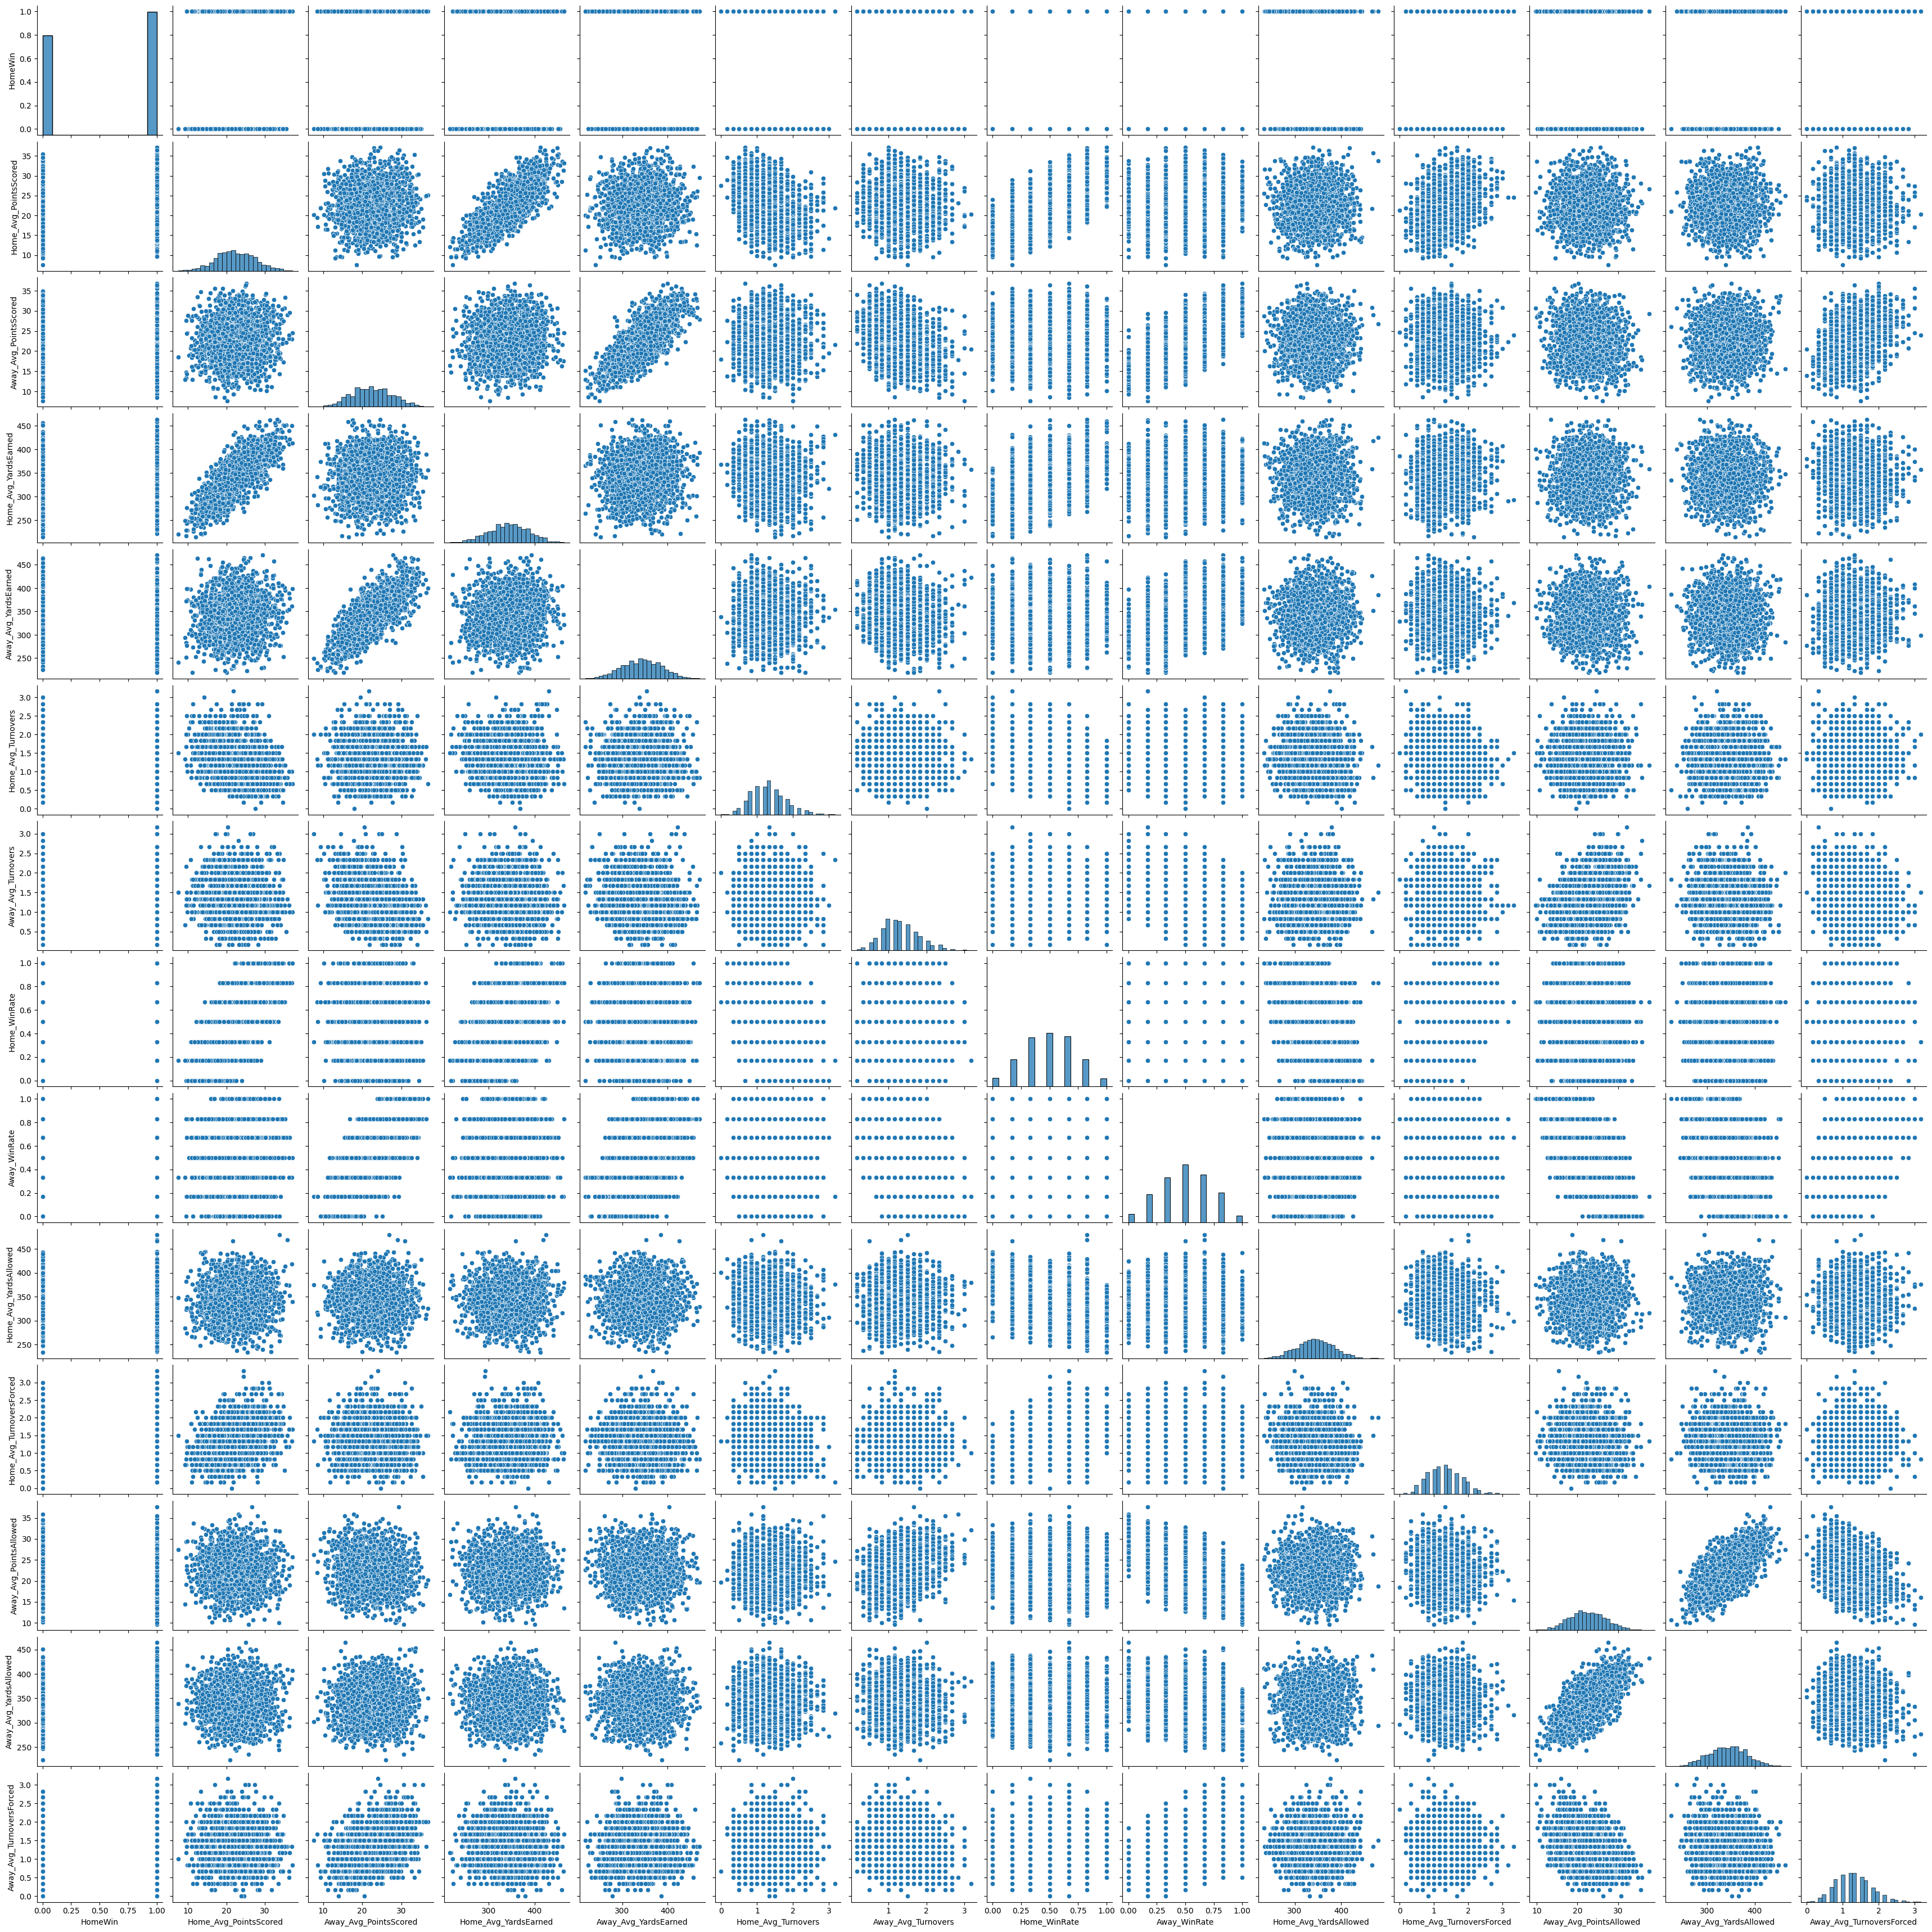

In [12]:
# PairPlot
sns.pairplot(games[corr_columns])
plt.show()

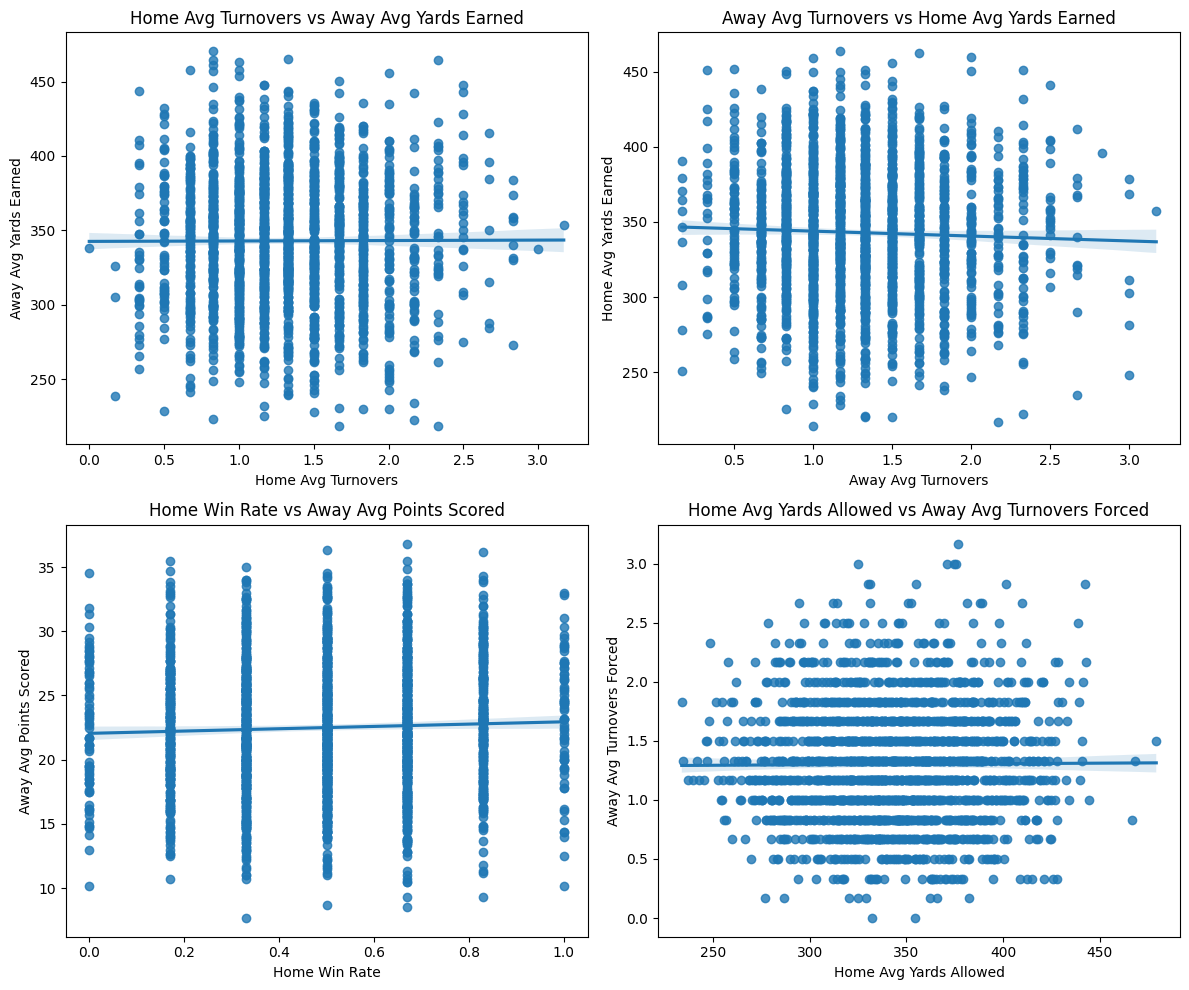

In [13]:
# Set up a 2x2 grid for subplots
plt.figure(figsize=(12, 10))

# Scatter plot 1: Home Average Turnovers vs Away Average Yards Earned
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
sns.regplot(data=games, x='Home_Avg_Turnovers', y='Away_Avg_YardsEarned', fit_reg=True)
plt.title("Home Avg Turnovers vs Away Avg Yards Earned")
plt.xlabel("Home Avg Turnovers")
plt.ylabel("Away Avg Yards Earned")

# Scatter plot 2: Away Average Turnovers vs Home Average Yards Earned
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
sns.regplot(data=games, x='Away_Avg_Turnovers', y='Home_Avg_YardsEarned', fit_reg=True)
plt.title("Away Avg Turnovers vs Home Avg Yards Earned")
plt.xlabel("Away Avg Turnovers")
plt.ylabel("Home Avg Yards Earned")

# Scatter plot 3: Home Win Rate vs Away Average Points Scored
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third subplot
sns.regplot(data=games, x='Home_WinRate', y='Away_Avg_PointsScored', fit_reg=True)
plt.title("Home Win Rate vs Away Avg Points Scored")
plt.xlabel("Home Win Rate")
plt.ylabel("Away Avg Points Scored")

# Scatter plot 4: Home Average Yards Allowed vs Away Average Turnovers Forced
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
sns.regplot(data=games, x='Home_Avg_YardsAllowed', y='Away_Avg_TurnoversForced', fit_reg=True)
plt.title("Home Avg Yards Allowed vs Away Avg Turnovers Forced")
plt.xlabel("Home Avg Yards Allowed")
plt.ylabel("Away Avg Turnovers Forced")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



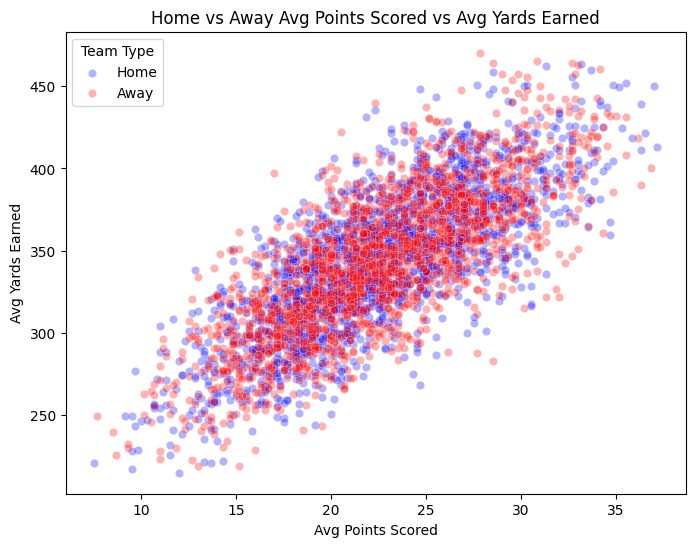

In [14]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Scatter plot: Home Average Points Scored vs Home Average Yards Earned (in blue)
sns.scatterplot(data=games, x='Home_Avg_PointsScored', y='Home_Avg_YardsEarned', color='blue', label='Home', alpha=0.3)

# Scatter plot: Away Average Points Scored vs Away Average Yards Earned (in orange)
sns.scatterplot(data=games, x='Away_Avg_PointsScored', y='Away_Avg_YardsEarned', color='red', label='Away', alpha=0.3)

# Set title and labels
plt.title("Home vs Away Avg Points Scored vs Avg Yards Earned")
plt.xlabel("Avg Points Scored")
plt.ylabel("Avg Yards Earned")

# Add legend
plt.legend(title="Team Type")

# Show the plot
plt.show()

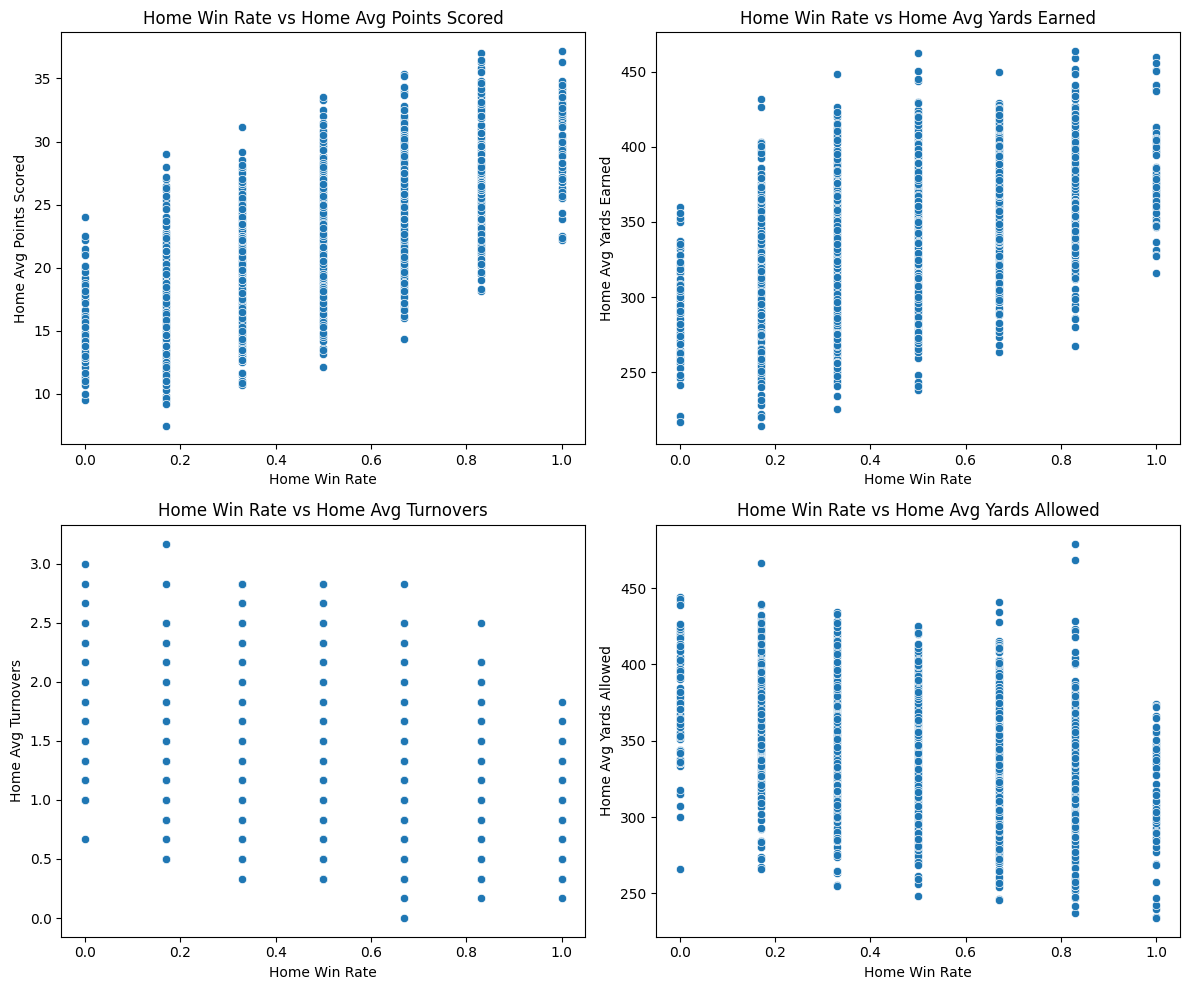

In [15]:
# Set up a 2x2 grid for subplots
plt.figure(figsize=(12, 10))

# Scatter plot 1: Home Win Rate vs Home Average Points Scored
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
sns.scatterplot(data=games, x='Home_WinRate', y='Home_Avg_PointsScored')
plt.title("Home Win Rate vs Home Avg Points Scored")
plt.xlabel("Home Win Rate")
plt.ylabel("Home Avg Points Scored")

# Scatter plot 2: Home Win Rate vs Home Average Yards Earned
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
sns.scatterplot(data=games, x='Home_WinRate', y='Home_Avg_YardsEarned')
plt.title("Home Win Rate vs Home Avg Yards Earned")
plt.xlabel("Home Win Rate")
plt.ylabel("Home Avg Yards Earned")

# Scatter plot 3: Home Win Rate vs Home Average Turnovers
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third subplot
sns.scatterplot(data=games, x='Home_WinRate', y='Home_Avg_Turnovers')
plt.title("Home Win Rate vs Home Avg Turnovers")
plt.xlabel("Home Win Rate")
plt.ylabel("Home Avg Turnovers")

# Scatter plot 4: Home Win Rate vs Home Average Yards Allowed
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
sns.scatterplot(data=games, x='Home_WinRate', y='Home_Avg_YardsAllowed')
plt.title("Home Win Rate vs Home Avg Yards Allowed")
plt.xlabel("Home Win Rate")
plt.ylabel("Home Avg Yards Allowed")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Team_stats csv
df = pd.read_csv('Team_Stats.csv')
df.head()

Unnamed: 0  Total_Games  Win_Rate  Avg_PtsScored  Avg_PtsAllowed  \
0   Kansas City Chiefs        154.0      0.76          27.75           21.47   
1  Philadelphia Eagles        146.0      0.64          25.64           21.55   
2  Pittsburgh Steelers        135.0      0.59          21.99           21.15   
3        Buffalo Bills        145.0      0.64          25.23           20.30   
4   New Orleans Saints        139.0      0.59          25.07           21.02   

   Avg_Yards  Avg_YardsAllowed  Avg_TurnoverDiff  Avg_PointDiff  Avg_YardDiff  \
0     384.61            348.63             -0.25           6.27         35.98   
1     361.40            330.80             -0.09           4.09         30.60   
2     332.07            329.44             -0.30           0.84          2.63   
3     356.86            321.41             -0.36           4.94         35.45   
4     351.35            333.93             -0.27           4.05         17.42   

   ...  Away_PtsScored  Home_Yards  Away_Yards  Home_Turnover  Away_Turnover  \
0  ...           28.49      372.73      397.49           0.96           1.29   
1  ...           24.77      362.41      358.63           1.08           1.44   
2  ...           19.85      340.73      323.54           1.24           1.24   
3  ...           24.00      353.44      360.53           1.15           1.37   
4  ...           23.96      359.28      342.82           1.24           0.93   

   Last5_Win_Rate  Last5_Avg_PtsScored  Last5_Avg_PtsAllowed  \
0             0.8                 26.8                  17.2   
1             0.8                 23.8                  12.0   
2             0.6                 34.6                  26.8   
3             0.6                 21.2                  11.6   
4             0.6                 29.0                  21.2   

   Last5_Avg_TurnoverDiff  Last5_Avg_PointDiff  
0                    -1.4                  9.6  
1                    -1.0                 11.8  
2                    -1.0                  7.8  
3                    -0.6                  9.6  
4                     0.4                  7.8  

[5 rows x 21 columns]